# An Exploration of Gun Violence in America
## Author: Yihan Wang

The primary dataset that I will be using is “Gun Violence Data - Comprehensive record of over 260k US gun violence incidents from 2013-2018,” (https://www.kaggle.com/jameslko/gun-violence-data).
    
It was scraped from gunviolencearchive.org and contains data for all recorded gun violence incidents in the U.S. between January 2013 and March 2018, inclusive. Specifically, I will focus on fatal gun violence incidents (incidents that resulted in at least one death) during 2014-2017 because 2013 and 2018 data is incomplete. There are about 50,000 such cases.

There are several questions that I would like to answer with this data. First, has the prevalence and harmfulness of gun violence actually increased in the past several years as the greater media coverage would suggest? Second, what are the geographic patterns of gun violence? Is it more prevalent and harmful in certain regions? Third, what is the relationship between gun violence, gun ownership, and gun laws?

To answer the geographic question above, I will supplement the gun violence dataset with 2017 state population numbers from the US Census Bureau Annual Population Estimates (https://factfinder.census.gov/faces/nav/jsf/pages/index.xhtml). Incorporating this dataset will allow me to normalize gun violence figures by state population, resulting in a more accurate comparison of states.

To answer questions on gun ownership, I will use a dataset from the Bureau of Alcohol, Tobacco, and Firearms (ATF) on the number of registered weapons in each state in April 2017 (https://www.atf.gov/resource-center/docs/undefined/firearms-commerce-united-states-annual-statistical-update-2017/download).

For gun laws, I will use historical data on the number of gun laws for each state during 2014 - 2018 from http://statefirearmlaws.org/national-data.

In [1]:
%matplotlib inline

import seaborn as sns
from matplotlib import rcParams
import matplotlib.pyplot as plt
import squarify

import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
import plotly.graph_objs as go

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv('data/gun-violence-data_01-2013_03-2018.csv', parse_dates=['date'])

In [4]:
# Only include 2014-2017 because 2013 and 2018 are incomplete
df = df[(df.date >= '2014-01-01') & (df.date <= '2017-12-31')]

In [5]:
# Only include fatal incidents (at least one death)
df = df[df.n_killed >= 1]

In [6]:
df['year'] = df.date.dt.year
df['month'] = df.date.dt.month
df['month_name'] = df.date.dt.month_name()

In [7]:
months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

In [8]:
df['month_name'] = pd.Categorical(df['month_name'], categories=months, ordered=True)

In [9]:
df.head()

,incident_id,date,state,city_or_county,address,n_killed,n_injured,incident_url,source_url,incident_url_fields_missing,...,participant_name,participant_relationship,participant_status,participant_type,sources,state_house_district,state_senate_district,year,month,month_name
280,92383,2014-01-01,New York,Queens,113th Avenue,1,0,http://www.gunviolencearchive.org/incident/92383,http://www.timesledger.com/stories/2014/2/firs...,False,...,0::Julio Mora||1::Sheldon Smith,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.timesledger.com/stories/2014/2/firs...,33.0,14.0,2014,1,January
290,92215,2014-01-01,South Carolina,North Charleston,Niagara Street,1,0,http://www.gunviolencearchive.org/incident/92215,/www.thestate.com/2014/01/03/3188515/cops-name...,False,...,0::Janet Royal,NaN,0::Killed,0::Victim,http://www.postandcourier.com/article/20140101...,109.0,42.0,2014,1,January
292,92357,2014-01-01,Delaware,Wilmington,1400 block of West 3rd,1,0,http://www.gunviolencearchive.org/incident/92357,http://abclocal.go.com/wpvi/story,False,...,0::Allen Whitt,NaN,0::Killed,0::Victim,http://abclocal.go.com/wpvi/story,3.0,3.0,2014,1,January
293,92790,2014-01-01,Colorado,Grand Junction,2846 Unaweep Ave,1,0,http://www.gunviolencearchive.org/incident/92790,http://www.nbc11news.com/home/headlines/law-en...,False,...,0::Randy Cook,NaN,0::Killed,0::Victim,http://www.nbc11news.com/home/headlines/Randy-...,54.0,7.0,2014,1,January
296,92342,2014-01-01,Alabama,Huntsville,2700 block of Bridge Road,1,0,http://www.gunviolencearchive.org/incident/92342,http://www.waff.com/story/24445797/police-make...,False,...,0::Mercedes Morris||1::Lopez Marittia Rice,NaN,0::Killed||1::Unharmed,0::Victim||1::Subject-Suspect,http://www.wsfa.com/story/24344374/police-resp...,19.0,7.0,2014,1,January


In [10]:
df.shape

(50581, 32)

# Overview of the Data Through Various Types of Plots

## Histogram

Text(0.5,1,'Number of Injuries in Fatal Gun Violence Incidents')

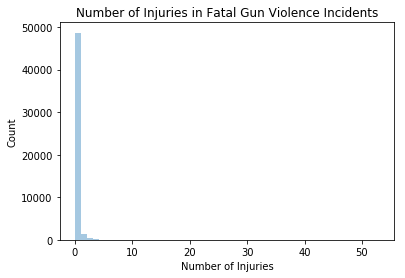

In [11]:
ax = sns.distplot(a=df.n_injured, kde=False)
ax.set(xlabel='Number of Injuries', ylabel='Count')
ax.set_title("Number of Injuries in Fatal Gun Violence Incidents")

## Barplot

In [12]:
sns.set(rc={'figure.figsize':(12,8)})

Text(0.5,1,'Number of Fatal Gun Violence Incidents')

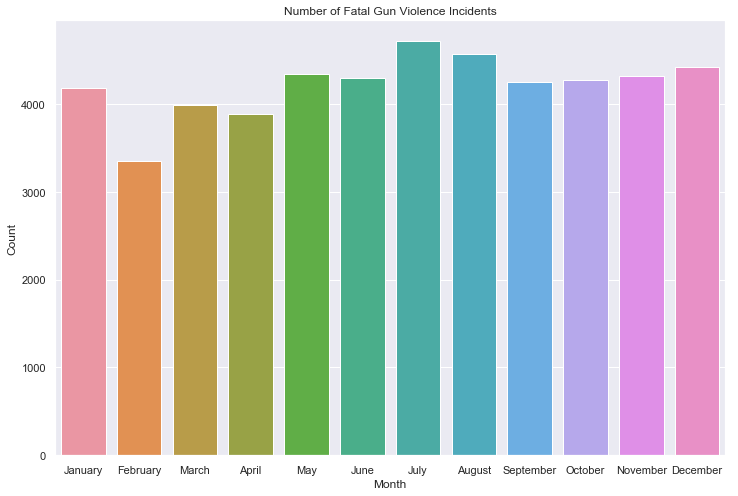

In [13]:
ax = sns.countplot(x="month_name", data=df)
ax.set(xlabel='Month', ylabel='Count')
ax.set_title("Number of Fatal Gun Violence Incidents")

## Boxplot

In [14]:
sns.reset_orig()

[Text(0.5,0,'Number of Deaths')]

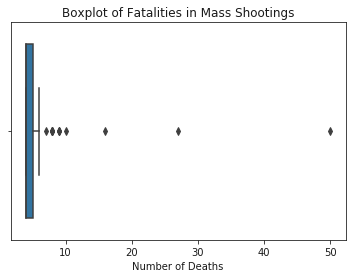

In [15]:
# Mass shootings are defined as 4 or more deaths
ax = sns.boxplot(x=df.n_killed[df.n_killed >= 4])
ax.set_title("Boxplot of Fatalities in Mass Shootings")
ax.set(xlabel='Number of Deaths')

## Scatterplot

Text(0.5,1,'Fatal Gun Violence Incidents')

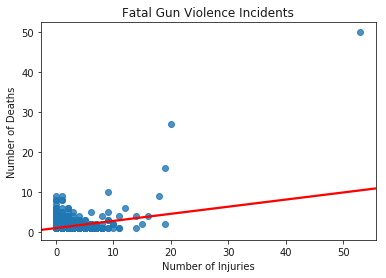

In [16]:
ax = sns.regplot(x="n_injured", y="n_killed", data=df, ci=False, line_kws={'color':'red'})
ax.set(xlabel='Number of Injuries', ylabel='Number of Deaths')
ax.set_title("Fatal Gun Violence Incidents")

## Bubble Map

In [17]:
# Round latitude and longitude to the precision of region-level
df['lat_rounded'] = df.latitude.round()
df['lon_rounded'] = df.longitude.round()

In [18]:
lat_lon_grouped = df.groupby(['lat_rounded', 'lon_rounded']).size().reset_index()

In [19]:
lat_lon_grouped.columns = ['lat', 'lon', 'num_incidents']

In [20]:
lat_lon_grouped['text'] = lat_lon_grouped.num_incidents.astype(str) + " incident(s)"

In [21]:
lat_lon_grouped = lat_lon_grouped.sort_values('num_incidents', ascending=False).reset_index()

In [22]:
limits = [(0,5), (6,25),(26,50),(51,100),(101,len(lat_lon_grouped))]
colors = ["rgb(0,116,217)","rgb(255,65,54)","rgb(133,20,75)","rgb(255,133,27)","lightgrey"]

In [23]:
regions = []

In [24]:
for i in range(len(limits)):
    lim = limits[i]
    df_sub = lat_lon_grouped[lim[0]:lim[1]]
    region = go.Scattergeo(
        locationmode = 'USA-states',
        lon = df_sub['lon'],
        lat = df_sub['lat'],
        text = df_sub['text'],
        marker = go.scattergeo.Marker(
            size = df_sub['num_incidents'],
            color = colors[i],
            line = go.scattergeo.marker.Line(
                width=0.5, color='rgb(40,40,40)'
            ),
            sizemode = 'area'
        ),
        name = 'Rank: {0} - {1}'.format(lim[0],lim[1]) )
    regions.append(region)

In [25]:
layout = go.Layout(
        title = go.layout.Title(
            text = 'Number of fatal gun violence incidents: sized by count, colored in descending rank order'
        ),
        showlegend = True,
        geo = go.layout.Geo(
            scope = 'usa',
            projection = go.layout.geo.Projection(
                type='albers usa'
            ),
            showland = True,
            landcolor = 'rgb(217, 217, 217)',
            subunitwidth=1,
            countrywidth=1,
            subunitcolor="rgb(255, 255, 255)",
            countrycolor="rgb(255, 255, 255)"
        )
    )

In [26]:
fig = go.Figure(data=regions, layout=layout)

In [27]:
py.iplot(fig)

In [28]:
plotly.offline.plot(fig, filename = "gun_violence_incidents.html")

'file:///Users/yihan/Dropbox/msds/msds622_data_viz/gun-violence-visualization/gun_violence_incidents.html'

## Chloropleth Map (Interactive Plot)

In [29]:
state_pop = pd.read_csv('data/state_code_2017pop.csv')

In [30]:
state_pop['population'] = pd.to_numeric(state_pop.population)

In [31]:
death_state_year = df.groupby(['state', 'year']).agg({'n_killed': 'sum'}).reset_index()

In [32]:
death_state_year = death_state_year.merge(state_pop, on='state', how='inner')

In [33]:
death_state_year['per_100k'] = death_state_year.n_killed / death_state_year.population * 100000

In [34]:
death_state_year['per_100k'] = death_state_year.per_100k.round(1)

In [35]:
data = []

In [36]:
for y in range(2014, 2018):
    data.append(dict(type='choropleth',
                     locations=death_state_year[death_state_year.year == y].code.astype(str), \
                     z=death_state_year[death_state_year.year == y].per_100k.astype(float),
                     text=death_state_year[death_state_year.year == y].state.astype(str),
                     locationmode='USA-states',
                     colorbar=dict(title='Gun Deaths per 100,000 Persons'), 
                     zmin=0, zmax=18)
               )

In [37]:
steps = []
for i in range(len(data)):
    step = dict(method='restyle', args=['visible', [False] * len(data)], label='Year {}'.format(i + 2014))
    step['args'][1][i] = True
    steps.append(step)

In [38]:
sliders = [dict(active=0, pad={"t": 1}, steps=steps)]

In [39]:
layout = dict(geo=dict(scope='usa', projection={'type': 'albers usa'}), 
              title=dict(text='States in the Deep South (LA, MS, AL) have the highest rates of gun deaths'), 
              sliders=sliders)

In [40]:
fig = dict(data=data, layout=layout)

In [41]:
py.iplot(fig)

In [42]:
plotly.offline.plot(fig, filename = "gun_deaths.html")

'file:///Users/yihan/Dropbox/msds/msds622_data_viz/gun-violence-visualization/gun_deaths.html'

## Connection Map

In [43]:
# Mass shootings are defined as 4 or more deaths
mass = df[df.n_killed >= 4][['date', 'latitude', 'longitude']]

In [44]:
mass.columns = ['date', 'lat', 'lon']

In [45]:
mass['lat_lead'] = mass.lat.shift(-1)

In [46]:
mass['lon_lead'] = mass.lon.shift(-1)

In [47]:
mass = mass.dropna(axis=0, how='any')

In [48]:
mass = mass.reset_index()

In [49]:
sites = [go.Scattergeo(
    locationmode = 'USA-states',
    lon = mass['lon'],
    lat = mass['lat'],
    hoverinfo = 'text',
    text = mass['date'],
    mode = 'markers',
    marker = go.scattergeo.Marker(
        size = 2,
        color = 'rgb(255, 0, 0)',
        line = go.scattergeo.marker.Line(
            width = 3,
            color = 'rgba(68, 68, 68, 0)'
        )
    ))]

In [50]:
paths = []

In [51]:
for i in range(len(mass)):
    paths.append(
        go.Scattergeo(
            locationmode = 'USA-states',
            lon = [mass['lon'][i], mass['lon_lead'][i]],
            lat = [mass['lat'][i], mass['lat_lead'][i]],
            mode = 'lines',
            line = go.scattergeo.Line(
                width = 1,
                color = 'blue',
            ),
        )
    )

In [52]:
layout = go.Layout(
    title = go.layout.Title(
        text = 'Mass Shooting Sites Connected in Chronological Order'
    ),
    showlegend = False,
    geo = go.layout.Geo(
        scope = 'north america',
        projection = go.layout.geo.Projection(type = 'azimuthal equal area'),
        showland = True,
        landcolor = 'rgb(243, 243, 243)',
        countrycolor = 'rgb(204, 204, 204)',
    ),
)

In [53]:
fig = go.Figure(data = sites + paths, layout = layout)

In [54]:
py.iplot(fig)

In [55]:
plotly.offline.plot(fig, filename = "mass_shootings.html")

'file:///Users/yihan/Dropbox/msds/msds622_data_viz/gun-violence-visualization/mass_shootings.html'

## Heat Map

In [56]:
num_incidents_time = df.groupby(['year', 'month']).size().reset_index()

In [57]:
num_incidents_time.columns = ['year', 'month', 'num_incidents']

In [58]:
num_incidents_time = num_incidents_time.pivot(index='month', columns='year', values='num_incidents')

Text(0.5,1,'Number of Fatal Gun Violence Incidents')

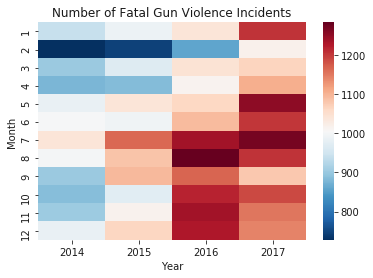

In [59]:
ax = sns.heatmap(num_incidents_time, cmap="RdBu_r")
ax.set(xlabel='Year', ylabel='Month')
ax.set_title("Number of Fatal Gun Violence Incidents")

## Stacked Area Graph

In [60]:
death_injury_time = df.groupby(['year', 'month']).agg({'n_killed': 'sum', 'n_injured': 'sum'}).reset_index()

In [61]:
death_injury_time['year_month'] = pd.to_datetime(death_injury_time[['year', 'month']].assign(Day=1))

In [62]:
death_injury_time['year_month'] = death_injury_time['year_month'].dt.strftime('%y-%m')

Text(0,0.5,'Total')

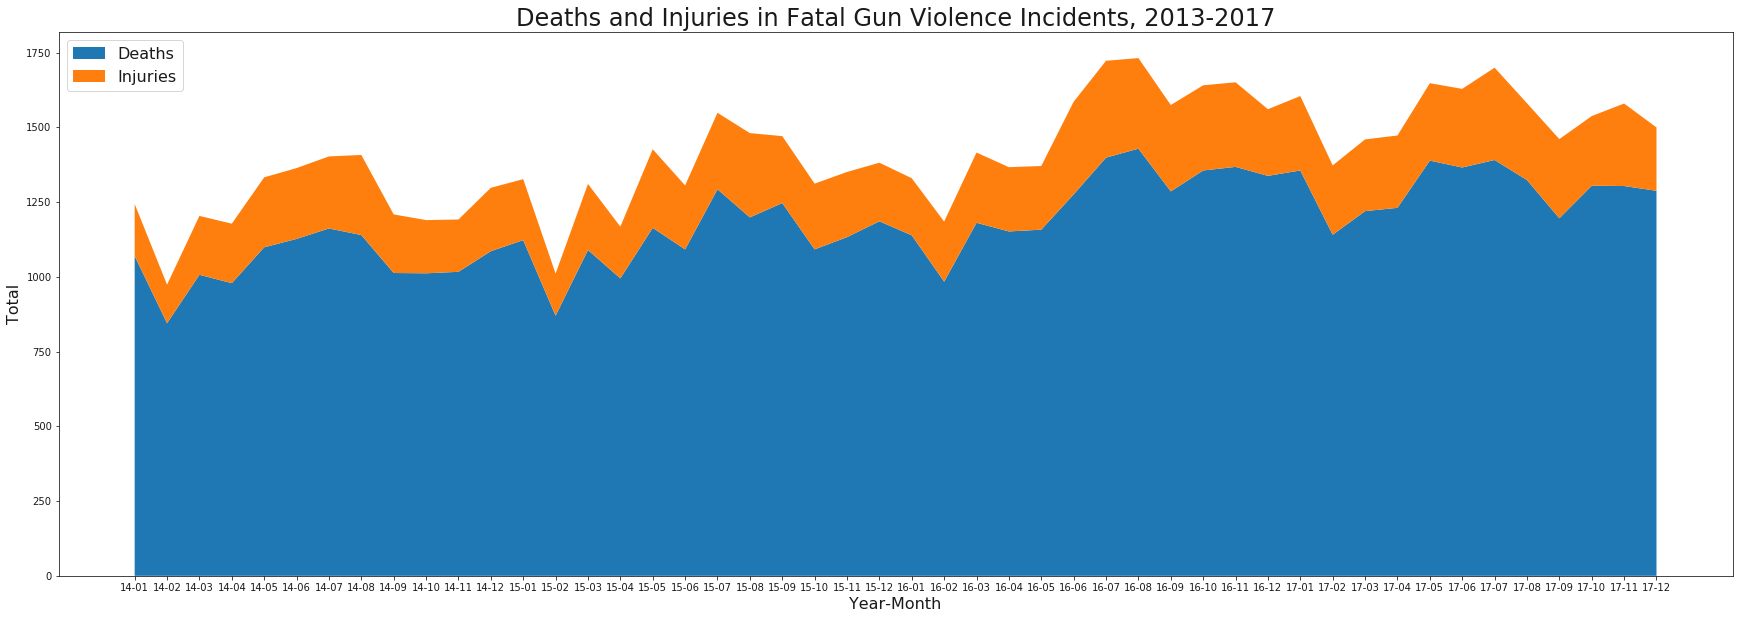

In [63]:
plt.figure(figsize=(30,10))
plt.stackplot(death_injury_time.year_month.values, death_injury_time.n_killed.values, death_injury_time.n_injured.values, labels=['Deaths', 'Injuries'])
plt.legend(loc='upper left', fontsize=16)
plt.title('Deaths and Injuries in Fatal Gun Violence Incidents, 2013-2017', fontsize=24)
plt.xlabel('Year-Month', fontsize=16)
plt.ylabel('Total', fontsize=16)

## Treemap

In [64]:
death_month = df.groupby(['month_name']).agg({'n_killed': 'sum'}).reset_index()

In [65]:
death_month["label"] = death_month.month_name.astype("str") + " - " + death_month.n_killed.astype("str")

In [66]:
death_month = death_month.sort_values(by='n_killed', ascending=False)

In [67]:
colors = ["#248af1", "#eb5d50", "#8bc4f6", "#8c5c94", "#a170e8", "#fba521", "#75bc3f"]

In [68]:
rcParams['figure.figsize'] = (16.0, 9.0)

Text(0.5,1,'Number of Gun Deaths by Month, 2013-2017')

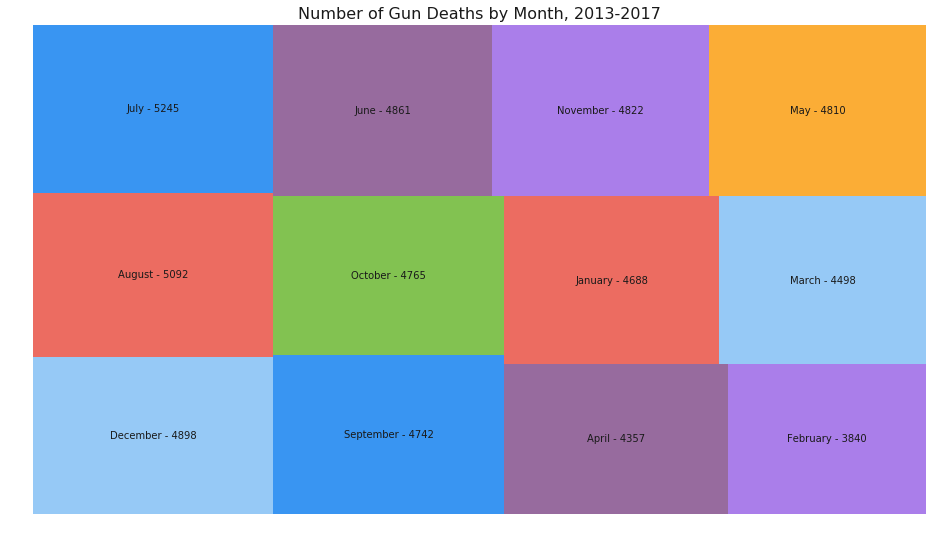

In [69]:
squarify.plot(sizes=death_month.n_killed, label=death_month.label, alpha=0.9, color=colors)
plt.axis('off')
plt.gca().invert_yaxis()
plt.title("Number of Gun Deaths by Month, 2013-2017", fontsize=16)

# Digging Deeper: Gun Ownership and Fatal Gun Incidents

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
incidents_state_year = df.groupby(['state', 'year']).agg({'incident_id': 'count'}).reset_index()

In [72]:
incidents_state_year = incidents_state_year.rename(index=str, columns={"incident_id": "num_incidents"})

In [73]:
# Number of fatal incidents by state and year
incidents_state_year.head()

,state,year,num_incidents
0,Alabama,2014,303
1,Alabama,2015,345
2,Alabama,2016,445
3,Alabama,2017,488
4,Alaska,2014,27


In [74]:
# Average annual number of fatal incidents by state, 2014-2017
incidents_state_year = incidents_state_year.groupby(['state']).agg({'num_incidents': 'mean'}).reset_index()

In [75]:
incidents_state_year.head()

,state,num_incidents
0,Alabama,395.25
1,Alaska,56.25
2,Arizona,216.75
3,Arkansas,162.00
4,California,1170.00


In [76]:
owner = pd.read_csv('data/registered_guns.csv')

In [77]:
owner.head()

,state,registered_guns
0,Alabama,161641
1,Alaska,15824
2,Arkansas,79841
3,Arizona,179738
4,California,344622


In [78]:
incidents_state_year = incidents_state_year.merge(owner, on='state', how='inner')

In [79]:
incidents_state_year = incidents_state_year.merge(state_pop[['state', 'population']], on='state', how='inner')

In [80]:
incidents_state_year.head()

,state,num_incidents,registered_guns,population
0,Alabama,395.25,161641,4874747
1,Alaska,56.25,15824,739795
2,Arizona,216.75,179738,7016270
3,Arkansas,162.00,79841,3004279
4,California,1170.00,344622,39536653


In [81]:
incidents_state_year['incidents_per_100k'] = \
incidents_state_year.num_incidents / incidents_state_year.population * 100000

In [82]:
incidents_state_year['guns_per_100k'] = \
incidents_state_year.registered_guns / incidents_state_year.population * 100000

In [83]:
incidents_state_year['incidents_per_100k'] = incidents_state_year.incidents_per_100k.round(1)

In [84]:
incidents_state_year['guns_per_100k'] = incidents_state_year.guns_per_100k.round(1)

In [85]:
incidents_state_year.head()

,state,num_incidents,registered_guns,population,incidents_per_100k,guns_per_100k
0,Alabama,395.25,161641,4874747,8.1,3315.9
1,Alaska,56.25,15824,739795,7.6,2139.0
2,Arizona,216.75,179738,7016270,3.1,2561.7
3,Arkansas,162.00,79841,3004279,5.4,2657.6
4,California,1170.00,344622,39536653,3.0,871.7


In [86]:
p1 = go.Scatter(
    x=incidents_state_year.guns_per_100k,
    y=incidents_state_year.incidents_per_100k,
    mode='markers',
    marker=dict(color='blue'),
    text=incidents_state_year.state,
    textposition='top center'
)

In [87]:
regr = LinearRegression()

In [88]:
regr.fit(X=incidents_state_year.guns_per_100k.values.reshape(-1, 1), y=incidents_state_year.incidents_per_100k)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [89]:
p2 = go.Scatter(x=incidents_state_year.guns_per_100k, 
                y=regr.predict(incidents_state_year.guns_per_100k.values.reshape(-1, 1)),
                mode='lines',
                line=dict(color='red', width=3)
                )

In [90]:
data = [p1, p2]

In [91]:
layout = go.Layout(showlegend=False, 
                   title='There is a weak relationship between gun ownership and number of fatal gun incidents', 
                   xaxis=dict(title='Registered Guns per 100K Persons'), 
                   yaxis=dict(title='Avg Annual Fatal Gun Incidents per 100K Persons'))

In [92]:
fig = go.Figure(data=data, layout=layout)

In [93]:
py.iplot(fig)

The graph above shows a weak linear relationship between gun ownership and the number of fatal gun incidents. However, Wyoming and Washington D.C. are clear outliers. What would the regression line look like if we removed them?

In [94]:
# Remove Wyoming and Washington D.C.
incidents_state_year = \
incidents_state_year[(incidents_state_year.state != 'District of Columbia') & 
                     (incidents_state_year.state != 'Wyoming')]

In [95]:
p1 = go.Scatter(
    x=incidents_state_year.guns_per_100k,
    y=incidents_state_year.incidents_per_100k,
    mode='markers',
    marker=dict(color='blue'),
    text=incidents_state_year.state,
    textposition='top center'
)

In [96]:
regr = LinearRegression()

In [97]:
regr.fit(X=incidents_state_year.guns_per_100k.values.reshape(-1, 1), y=incidents_state_year.incidents_per_100k)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [98]:
p2 = go.Scatter(x=incidents_state_year.guns_per_100k, 
                y=regr.predict(incidents_state_year.guns_per_100k.values.reshape(-1, 1)),
                mode='lines',
                line=dict(color='red', width=3)
                )

In [99]:
data = [p1, p2]

In [100]:
layout = go.Layout(showlegend=False, 
                   title='After removing outliers, the relationship is still weak', 
                   xaxis=dict(title='Registered Guns per 100K Persons'), 
                   yaxis=dict(title='Avg Annual Fatal Gun Incidents per 100K Persons'))

In [101]:
fig = go.Figure(data=data, layout=layout)

In [102]:
py.iplot(fig)

After removing outliers, the relationship between gun ownership and the number of fatal gun incidents is still weak.

# Do Gun Deaths Lead to More Gun Laws?

In [103]:
laws = pd.read_csv('data/gun_laws.csv')

In [104]:
laws.head()

,state,year,num_laws
0,Alabama,2013,10
1,Alabama,2014,10
2,Alabama,2015,10
3,Alabama,2016,10
4,Alabama,2017,10


In [105]:
laws.shape

(300, 3)

In [106]:
lag_laws = laws.groupby(['state'])['year', 'num_laws'].shift(1).reset_index()

In [107]:
laws['prev_year'] = lag_laws['year']

In [108]:
laws['num_laws_prev_year'] = lag_laws['num_laws']

In [109]:
laws = laws[laws.year != 2013]

In [110]:
# Change in the number of gun laws from the previous year
laws['change_num_laws'] = laws.num_laws - laws.num_laws_prev_year

In [111]:
laws.head()

,state,year,num_laws,prev_year,num_laws_prev_year,change_num_laws
1,Alabama,2014,10,2013.0,10.0,0.0
2,Alabama,2015,10,2014.0,10.0,0.0
3,Alabama,2016,10,2015.0,10.0,0.0
4,Alabama,2017,10,2016.0,10.0,0.0
5,Alabama,2018,10,2017.0,10.0,0.0


In [112]:
death_state_year = death_state_year.rename(index=str, columns={"year": "prev_year", "per_100k": "deaths_per_100k"})

In [113]:
laws = laws.merge(death_state_year, on=['state', 'prev_year'], how='left')

In [114]:
laws = laws[['state', 'year', 'num_laws', 'prev_year', 'num_laws_prev_year', 
             'change_num_laws', 'n_killed', 'deaths_per_100k']]

In [115]:
laws = laws.rename(index=str, columns={"n_killed": "n_killed_prev_year"})

In [116]:
laws = laws[laws.year != 2014]

In [117]:
laws['year'] = laws.year.apply(str)

In [118]:
laws['state_year'] = laws.state + '-' + laws.year

In [119]:
laws.head()

,state,year,num_laws,prev_year,num_laws_prev_year,change_num_laws,n_killed_prev_year,deaths_per_100k,state_year
1,Alabama,2015,10,2014.0,10.0,0.0,325.0,6.7,Alabama-2015
2,Alabama,2016,10,2015.0,10.0,0.0,385.0,7.9,Alabama-2016
3,Alabama,2017,10,2016.0,10.0,0.0,488.0,10.0,Alabama-2017
4,Alabama,2018,10,2017.0,10.0,0.0,544.0,11.2,Alabama-2018
6,Alaska,2015,3,2014.0,3.0,0.0,29.0,3.9,Alaska-2015


In [120]:
p1 = go.Scatter(
    x=laws.n_killed_prev_year,
    y=laws.change_num_laws,
    mode='markers',
    marker=dict(color='blue'),
    text=laws.state_year,
    textposition='top center'
)

In [121]:
regr = LinearRegression()

In [122]:
regr.fit(X=laws.n_killed_prev_year.values.reshape(-1, 1), y=laws.change_num_laws)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [123]:
p2 = go.Scatter(x=laws.n_killed_prev_year, 
                y=regr.predict(laws.n_killed_prev_year.values.reshape(-1, 1)),
                mode='lines',
                line=dict(color='red', width=3)
                )

In [124]:
data = [p1, p2]

In [125]:
layout = go.Layout(showlegend=False, 
                   title='More gun deaths are not associated with more gun laws', 
                   xaxis=dict(title='Number of Gun Deaths in Previous Year'), 
                   yaxis=dict(title='Change in Number of Gun Laws from Previous Year'))

In [126]:
fig = go.Figure(data=data, layout=layout)

In [127]:
py.iplot(fig)